In [ ]:
# In Linear and Logistic Regression, the model can only and only undersatnd numbers

In [1]:
# EDA --> Understand the data
# Data Cleaning --> Null values, Outliers
# Encoding --> Converting the object data type to numeric
# Label Encoding, One-hot Encoding
# VIF --> Variance Inflation Factor(Multicollinearity) --> 
# Import the libraries
# Train the model
# Test the model
# Accuracy score, classification Report

In [99]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore") # It will ignore all the warnings that appear after you execute a code

In [100]:
data=pd.read_csv('bank-additional-full.csv', sep=';') # utf encoding

In [101]:
# Continous data --> There is no predefined range, salary of a person
# Categorical data --> Within a range/within a set limit --> yes/no, 0/1

In [102]:
data.head()
# y--> no--> did not buy insurance
# yes---> bought it

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [103]:
# I f the target variable is having a continous data --> regression models
# Linear Regresssion, Decision Tree Regressor, Random Forest Regressor, Naive Bayes Regressor, SVM Regressor
# If the target variable is having a categorical data --> Classification models
# Logistic Regression, Decision Tree Classifier, Random Forest Classifier, Naive Bayes Classifier, SVM Classifier

In [104]:
data['y'].value_counts()

no     36556
yes     4640
Name: y, dtype: int64

In [105]:
data.shape  # The no. of rows and columns present in the dataset

(41199, 21)

In [106]:
data.describe() # Statistical analylis

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41195.000000,41196.000000,41196.000000,41196.000000,41196.000000,41196.000000,41195.000000,41196.000000,41196.000000,41196.000000
mean,40.030319,258.281265,2.567676,962.482547,0.173124,0.081656,93.575867,-40.504600,3.620787,5166.996405
std,10.431818,259.254211,2.769751,186.893451,0.494987,1.570894,0.578999,4.629972,1.734655,72.300104
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [107]:
data.dtypes # data type of each and every column

age               float64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration          float64
campaign          float64
pdays             float64
previous          float64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [108]:
data.shape

(41199, 21)

In [109]:
data.info() # total count of non-null values along with data type for each and evry column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41199 entries, 0 to 41198
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41195 non-null  float64
 1   job             41194 non-null  object 
 2   marital         41194 non-null  object 
 3   education       41194 non-null  object 
 4   default         41195 non-null  object 
 5   housing         41196 non-null  object 
 6   loan            41195 non-null  object 
 7   contact         41195 non-null  object 
 8   month           41196 non-null  object 
 9   day_of_week     41196 non-null  object 
 10  duration        41196 non-null  float64
 11  campaign        41196 non-null  float64
 12  pdays           41196 non-null  float64
 13  previous        41196 non-null  float64
 14  poutcome        41194 non-null  object 
 15  emp.var.rate    41196 non-null  float64
 16  cons.price.idx  41195 non-null  float64
 17  cons.conf.idx   41196 non-null 

In [110]:
data['y'] # It will be my target variable

0         no
1         no
2         no
3         no
4         no
        ... 
41194     no
41195     no
41196     no
41197    NaN
41198     no
Name: y, Length: 41199, dtype: object

In [111]:
data['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1726
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [112]:
data['default'].value_counts()

no         32595
unknown     8597
yes            3
Name: default, dtype: int64

In [113]:
data['y'].value_counts()

no     36556
yes     4640
Name: y, dtype: int64

In [114]:
#extra step--> if needed skip it --> if yes-- 1 or no-- 0
data['y'] = np.where(data['y'] == 'yes',1,0)  # I replaced yes -> 1, no -> 0
data['y'] = data['y'].astype(str)

In [115]:
data.dtypes

age               float64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration          float64
campaign          float64
pdays             float64
previous          float64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [116]:
data['y'].tail()

41194    0
41195    0
41196    0
41197    0
41198    0
Name: y, dtype: object

In [117]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41194,74.0,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3.0,999.0,1.0,failure,-1.1,94.767,-50.8,1.028,4963.6,0
41195,74.0,NaN,married,professional.course,no,yes,no,cellular,nov,fri,...,3.0,999.0,1.0,failure,-1.1,94.767,-50.8,1.028,4963.6,0
41196,74.0,retired,married,NaN,no,yes,no,cellular,nov,fri,...,3.0,999.0,1.0,failure,-1.1,94.767,-50.8,1.028,4963.6,0
41197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [118]:
data.dtypes

age               float64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration          float64
campaign          float64
pdays             float64
previous          float64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [119]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [120]:
# In linear and logistic regression models, we need to treat the outliers and the null values

In [121]:
data.dtypes

age               float64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration          float64
campaign          float64
pdays             float64
previous          float64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [122]:
data.isna().sum()

#isnull().sum()
#isna()---> check the null values
#sum()----> added and given the result

age               4
job               5
marital           5
education         5
default           4
housing           3
loan              4
contact           4
month             3
day_of_week       3
duration          3
campaign          3
pdays             3
previous          3
poutcome          5
emp.var.rate      3
cons.price.idx    4
cons.conf.idx     3
euribor3m         3
nr.employed       3
y                 0
dtype: int64

In [123]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41199 entries, 0 to 41198
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41195 non-null  float64
 1   job             41194 non-null  object 
 2   marital         41194 non-null  object 
 3   education       41194 non-null  object 
 4   default         41195 non-null  object 
 5   housing         41196 non-null  object 
 6   loan            41195 non-null  object 
 7   contact         41195 non-null  object 
 8   month           41196 non-null  object 
 9   day_of_week     41196 non-null  object 
 10  duration        41196 non-null  float64
 11  campaign        41196 non-null  float64
 12  pdays           41196 non-null  float64
 13  previous        41196 non-null  float64
 14  poutcome        41194 non-null  object 
 15  emp.var.rate    41196 non-null  float64
 16  cons.price.idx  41195 non-null  float64
 17  cons.conf.idx   41196 non-null 

In [124]:
# Null values 
# dtype == object --> replace the null values with mode
# dtype == int/float --> replace the null values with mean/median
# If outliers are present --> Median
# If outliers are not present --> Mean
# 1  2  3  4  5  100
# mean = 115/6 --> 19.16
# 1 2 3 4 5
# mean = 15/5 --> 3

In [125]:
data['job'].mode() # An example to calculate the mode of a column

0    admin.
Name: job, dtype: object

In [126]:
# I just want the output to be the mode and nothing else
data['job'].mode()[0]

'admin.'

In [127]:
data.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41194,74.0,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3.0,999.0,1.0,failure,-1.1,94.767,-50.8,1.028,4963.6,0
41195,74.0,NaN,married,professional.course,no,yes,no,cellular,nov,fri,...,3.0,999.0,1.0,failure,-1.1,94.767,-50.8,1.028,4963.6,0
41196,74.0,retired,married,NaN,no,yes,no,cellular,nov,fri,...,3.0,999.0,1.0,failure,-1.1,94.767,-50.8,1.028,4963.6,0
41197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
41198,74.0,retired,married,professional.course,no,yes,NaN,cellular,nov,fri,...,3.0,999.0,1.0,failure,-1.1,NaN,-50.8,1.028,4963.6,0


In [128]:
data.isna().sum()

age               4
job               5
marital           5
education         5
default           4
housing           3
loan              4
contact           4
month             3
day_of_week       3
duration          3
campaign          3
pdays             3
previous          3
poutcome          5
emp.var.rate      3
cons.price.idx    4
cons.conf.idx     3
euribor3m         3
nr.employed       3
y                 0
dtype: int64

In [129]:
#outliers

In [130]:
data.dtypes

age               float64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration          float64
campaign          float64
pdays             float64
previous          float64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [131]:
data.duplicated().sum()
# data = data.drop_duplicates()

15

<AxesSubplot:xlabel='age'>

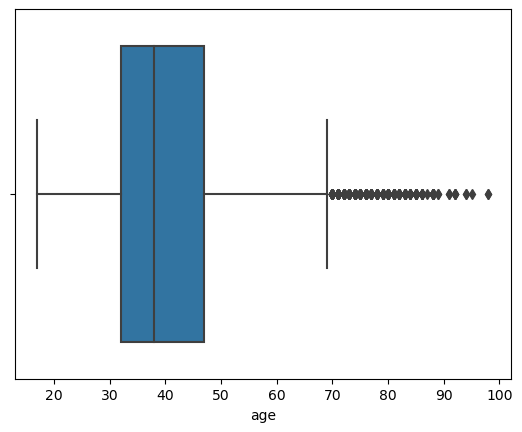

In [132]:
import seaborn as sns
sns.boxplot(x=data['age'])

In [133]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [134]:
col_list = list(data.columns)
col_list

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y']

In [135]:
import matplotlib.pyplot as plt

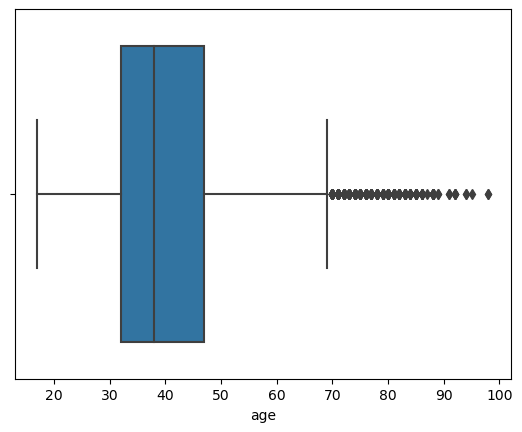

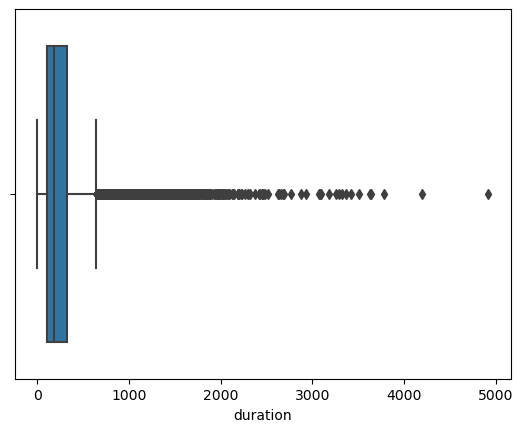

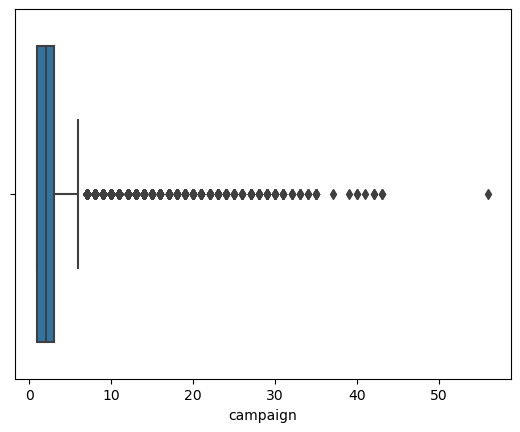

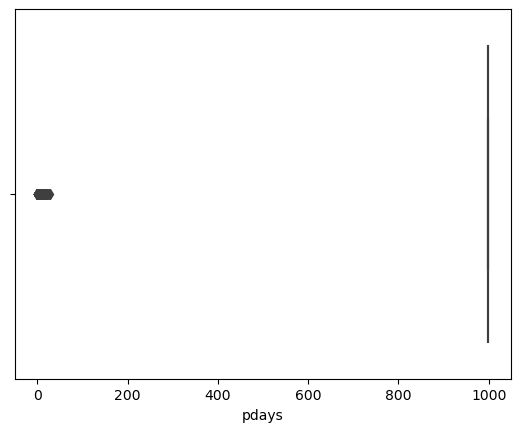

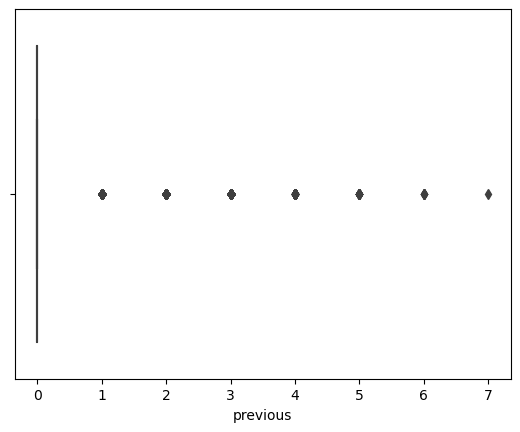

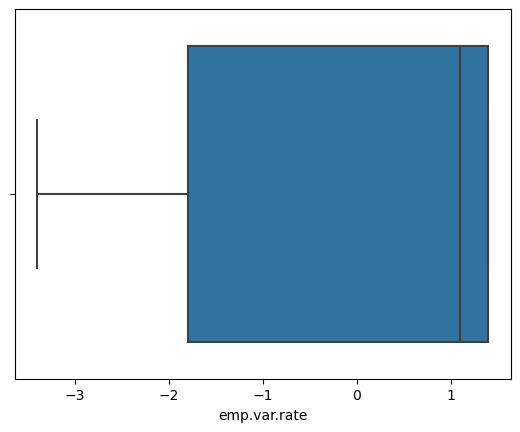

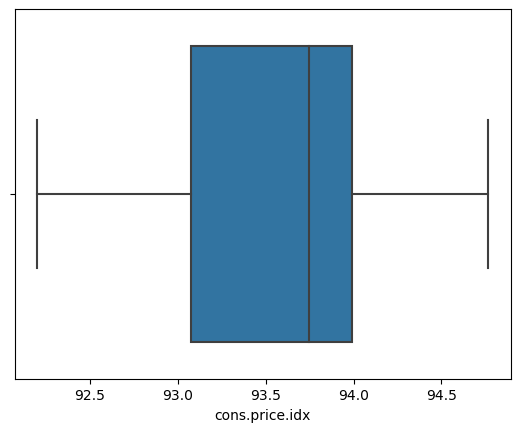

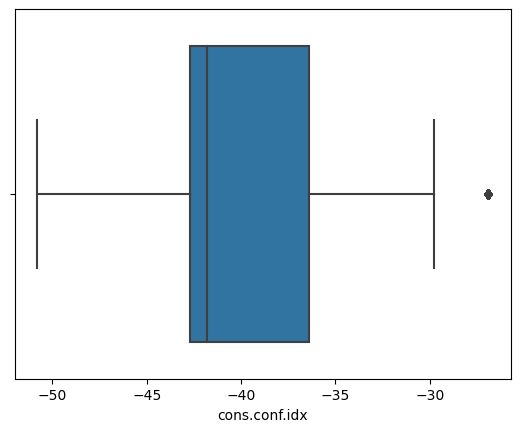

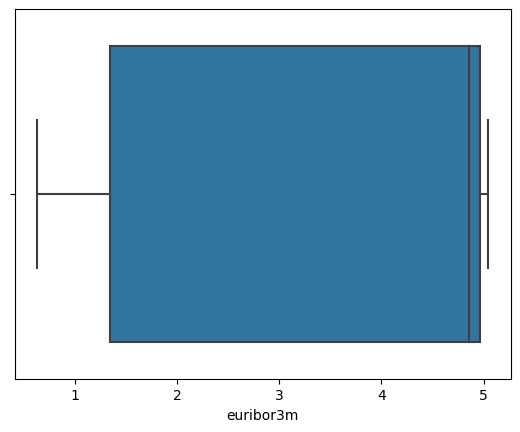

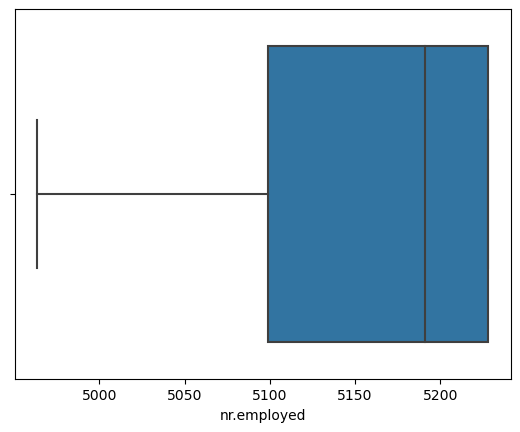

In [136]:
for i in col_list:
    if(data[i].dtype!='object'):
        plt.figure()
        sns.boxplot(x=data[i])

<AxesSubplot:xlabel='duration'>

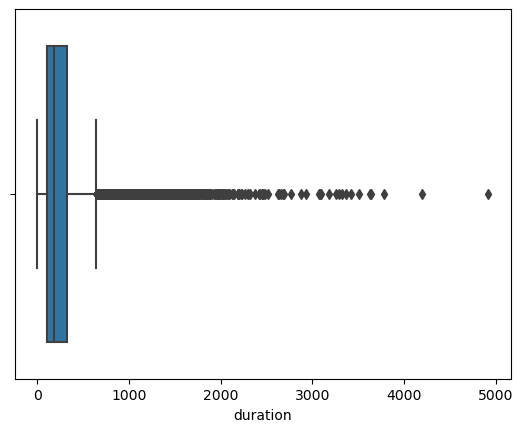

In [137]:
sns.boxplot(x=data['duration'])

In [138]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41195.000000,41196.000000,41196.000000,41196.000000,41196.000000,41196.000000,41195.000000,41196.000000,41196.000000,41196.000000
mean,40.030319,258.281265,2.567676,962.482547,0.173124,0.081656,93.575867,-40.504600,3.620787,5166.996405
std,10.431818,259.254211,2.769751,186.893451,0.494987,1.570894,0.578999,4.629972,1.734655,72.300104
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [139]:
# There are two ways fro treating the outliers
# One way is to remove the outliers column-wise
# The second way is to remove the outliers all at once for every numerical column

In [140]:
# Gerneralised formula
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
type(IQR)

age                15.000
duration          217.000
campaign            2.000
pdays               0.000
previous            0.000
emp.var.rate        3.200
cons.price.idx      0.919
cons.conf.idx       6.300
euribor3m           3.617
nr.employed       129.000
dtype: float64


pandas.core.series.Series

In [141]:
Q1, Q3

(age                 32.000
 duration           102.000
 campaign             1.000
 pdays              999.000
 previous             0.000
 emp.var.rate        -1.800
 cons.price.idx      93.075
 cons.conf.idx      -42.700
 euribor3m            1.344
 nr.employed       5099.100
 Name: 0.25, dtype: float64,
 age                 47.000
 duration           319.000
 campaign             3.000
 pdays              999.000
 previous             0.000
 emp.var.rate         1.400
 cons.price.idx      93.994
 cons.conf.idx      -36.400
 euribor3m            4.961
 nr.employed       5228.100
 Name: 0.75, dtype: float64)

In [142]:
# data = data[(data >= (Q1 - 1.5 * IQR)) & (data <= (Q3 + 1.5 * IQR)).any(axis =1)]
# Lower limit = Q1 - 1.5*IQR
# Upper Limit = Q3 + 1.5*IQR

In [143]:
# ~ --> Negation operator --> It provides the exact opposite of the condition mentioned
data = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)] # axis = 1 --> column wise
# axis = 0 --> row wise

In [144]:
d1 = data[((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]

In [145]:
d1

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y


In [146]:
a = int(input())
b = int(input())

ValueError: invalid literal for int() with base 10: ''

In [147]:
if(~(a==b)):
    print(True)
else:
    print(False)

NameError: name 'b' is not defined

In [148]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [149]:
data.shape  # Outliers are treated

(30363, 21)

In [150]:
data.columns  # fetch out all the column names present in the dataset

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [151]:
col_list = list(data.columns) #Type casting

In [152]:
col_list

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y']

In [153]:
col_list.remove('y')

In [154]:
col_list

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [155]:
data['age'].mode()[0]

31.0

In [156]:
#  1 1 2 2 3 3
# 0    1
# 1    2
# 2    3

In [157]:
for i in col_list:
    if data[i].dtypes=='object':
        #print('ob')
        data[i] = data[i].fillna(data[i].mode()[0])
    else:
        #print('num')
        data[i] = data[i].fillna(data[i].mean())
# If the column is a numeric column --> Reolace the null values with mean, if outliers are treated, otherwise
# replace with median

In [158]:
data.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [159]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [160]:
# Binning --> Grouping different value counts

In [161]:
data['age'].shape

(30363,)

In [162]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,30363.000000,30363.000000,30363.000000,30363.0,30363.0,30363.000000,30363.000000,30363.000000,30363.000000,30363.000000
mean,39.671080,204.932576,2.081555,999.0,0.0,0.388261,93.646458,-40.410119,3.970239,5181.932372
std,9.479865,140.207339,1.302636,0.0,0.0,1.418244,0.538597,4.164771,1.556246,60.636502
min,18.000000,0.000000,1.000000,999.0,0.0,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,100.000000,1.000000,999.0,0.0,-0.100000,93.200000,-42.700000,4.021000,5191.000000
50%,38.000000,167.000000,2.000000,999.0,0.0,1.100000,93.918000,-41.800000,4.859000,5195.800000
75%,47.000000,277.000000,3.000000,999.0,0.0,1.400000,93.994000,-36.400000,4.962000,5228.100000
max,69.000000,644.000000,6.000000,999.0,0.0,1.400000,94.767000,-29.800000,5.045000,5228.100000


In [163]:
data['age'].value_counts()

31.00000    1477
32.00000    1380
33.00000    1364
36.00000    1333
35.00000    1306
34.00000    1274
30.00000    1263
39.00000    1101
37.00000    1080
38.00000    1071
29.00000    1040
41.00000     992
40.00000     898
42.00000     888
45.00000     845
43.00000     799
46.00000     794
44.00000     786
28.00000     745
48.00000     735
47.00000     721
50.00000     650
49.00000     645
27.00000     612
51.00000     590
52.00000     589
53.00000     552
56.00000     540
54.00000     511
26.00000     503
57.00000     497
55.00000     497
58.00000     437
25.00000     436
59.00000     338
24.00000     301
60.00000     194
23.00000     139
22.00000      90
21.00000      67
61.00000      39
20.00000      38
64.00000      30
66.00000      26
62.00000      26
19.00000      24
63.00000      24
69.00000      18
65.00000      17
18.00000      14
68.00000      12
67.00000      12
39.67108       3
Name: age, dtype: int64

In [164]:
data['age'].min()

18.0

In [165]:
data['age'].max()

69.0

In [166]:
##Binning of Age##
# 10 15 25 50 75 
# 1-10-->  1,2,3,4,5,6,7,8,9
# 10-20->10, 15
# 20-30-> 25
# 50-80-> 50,75

# 10-20 10-20  20-30  50-80
#extra code
# data--> cat
# 10-25  25-50  50-100
# 10-25 --> 10 to 24
# 50-100 --> 50-99
bins = [10, 25, 50, 100]
data['age'] = pd.cut(data['age'], bins) # cut()--> for only binning purposes
data['age'] = data.age.astype(str)
# '10-25'  --> Label Encoding --> 0
# '25-50'  --> Label Encoding --> 1
# '50-100' --> Label Encoding --> 2

In [167]:
a = 12
a1 = str(a)
a1

'12'

In [168]:
a2 = 'abc'
a3 = int(a2)

ValueError: invalid literal for int() with base 10: 'abc'

In [169]:
data['age'].unique() # all the unique values

array(['(50, 100]', '(25, 50]', '(10, 25]'], dtype=object)

In [170]:
data.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,"(50, 100]",housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,"(50, 100]",services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,"(25, 50]",services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,"(25, 50]",admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,"(50, 100]",services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
5,"(25, 50]",services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
6,"(50, 100]",admin.,married,professional.course,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
7,"(25, 50]",blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
8,"(10, 25]",technician,single,professional.course,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
9,"(10, 25]",services,single,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [171]:
a=10
b=10
a!=b


False

In [172]:
# Label encoding --> The object data is converted into numeric data
# the conversion values will be according to alphabetical order
# job --> 2, admin --> 0 , banker --> 1
# age 
# 10-25,  25-50,  50-100
#  0        1        2

In [173]:
col_list = []
for col in data.columns:
    if ((data[col].dtype == 'object') & (col != 'y') ):
        col_list.append(col)

In [174]:
col_list

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [175]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,"(50, 100]",housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,"(50, 100]",services,married,high.school,unknown,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,"(25, 50]",services,married,high.school,no,yes,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,"(25, 50]",admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,"(50, 100]",services,married,high.school,no,no,yes,telephone,may,mon,...,1.0,999.0,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [176]:
col_list

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [177]:
# yes no --> 1 0
# male female --> 1 0
# We are performing label encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in col_list:
    data[i]=le.fit_transform(data[i]) # fit --> feed the data, transform --> convert the data into labels

In [178]:
# Labels are decided based upon their alphabetical order
# c, a, e, b, d
# a --> 0
# b --> 1
# c --> 2
# d --> 3
# e --> 4
# 2, 0, 4, 1, 3
#

In [179]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,2,3,1,0,0,0,0,1,6,1,...,1.0,999.0,0.0,0,1.1,93.994,-36.4,4.857,5191.0,0
1,2,7,1,3,1,0,0,1,6,1,...,1.0,999.0,0.0,0,1.1,93.994,-36.4,4.857,5191.0,0
2,1,7,1,3,0,2,0,1,6,1,...,1.0,999.0,0.0,0,1.1,93.994,-36.4,4.857,5191.0,0
3,1,0,1,1,0,0,0,1,6,1,...,1.0,999.0,0.0,0,1.1,93.994,-36.4,4.857,5191.0,0
4,2,7,1,3,0,0,2,1,6,1,...,1.0,999.0,0.0,0,1.1,93.994,-36.4,4.857,5191.0,0


In [180]:
# Linear Regression, Logistic Regression --> We have to pass only numbers

In [181]:
data['job'].value_counts()

0     7672
1     7146
9     5086
7     2966
4     2141
2     1096
6     1060
5      911
3      804
10     727
8      507
11     247
Name: job, dtype: int64

In [182]:
# bins --> 0->10-25, 1->25-50, 2->50-100
data.head()
# 1,2,5,7,9
# 0,1,2,3,4

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,2,3,1,0,0,0,0,1,6,1,...,1.0,999.0,0.0,0,1.1,93.994,-36.4,4.857,5191.0,0
1,2,7,1,3,1,0,0,1,6,1,...,1.0,999.0,0.0,0,1.1,93.994,-36.4,4.857,5191.0,0
2,1,7,1,3,0,2,0,1,6,1,...,1.0,999.0,0.0,0,1.1,93.994,-36.4,4.857,5191.0,0
3,1,0,1,1,0,0,0,1,6,1,...,1.0,999.0,0.0,0,1.1,93.994,-36.4,4.857,5191.0,0
4,2,7,1,3,0,0,2,1,6,1,...,1.0,999.0,0.0,0,1.1,93.994,-36.4,4.857,5191.0,0


In [183]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30363 entries, 0 to 41197
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             30363 non-null  int32  
 1   job             30363 non-null  int32  
 2   marital         30363 non-null  int32  
 3   education       30363 non-null  int32  
 4   default         30363 non-null  int32  
 5   housing         30363 non-null  int32  
 6   loan            30363 non-null  int32  
 7   contact         30363 non-null  int32  
 8   month           30363 non-null  int32  
 9   day_of_week     30363 non-null  int32  
 10  duration        30363 non-null  float64
 11  campaign        30363 non-null  float64
 12  pdays           30363 non-null  float64
 13  previous        30363 non-null  float64
 14  poutcome        30363 non-null  int32  
 15  emp.var.rate    30363 non-null  float64
 16  cons.price.idx  30363 non-null  float64
 17  cons.conf.idx   30363 non-null 

In [184]:
# Multicollinerity --> When we compare the relationship of all the columns with all the other columns at once
# VIF --> Variance Inflation Factor
# VIF helps us to reduce the multicollinearity among the independent variables
# VIF = 1 --> Variables are not multicorrelated
# VIF < 6 --> vARIABLES ARE MODERATELY multicorrelated --> Accepted
# VIF = More than 6 --> Variables are highly correlated, and we drop those columns

In [185]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
col_list = []
for col in data.columns:
    if ((data[col].dtype != 'object') & (col != 'y') ):
        col_list.append(col)

In [186]:
col_list

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [187]:
X=data[col_list]
X
#independent

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,2,3,1,0,0,0,0,1,6,1,261.000000,1.000000,999.0,0.0,0,1.100000,93.994000,-36.400000,4.857000,5191.000000
1,2,7,1,3,1,0,0,1,6,1,149.000000,1.000000,999.0,0.0,0,1.100000,93.994000,-36.400000,4.857000,5191.000000
2,1,7,1,3,0,2,0,1,6,1,226.000000,1.000000,999.0,0.0,0,1.100000,93.994000,-36.400000,4.857000,5191.000000
3,1,0,1,1,0,0,0,1,6,1,151.000000,1.000000,999.0,0.0,0,1.100000,93.994000,-36.400000,4.857000,5191.000000
4,2,7,1,3,0,0,2,1,6,1,307.000000,1.000000,999.0,0.0,0,1.100000,93.994000,-36.400000,4.857000,5191.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41185,2,5,1,6,0,2,0,0,7,0,189.000000,2.000000,999.0,0.0,0,-1.100000,94.767000,-50.800000,1.028000,4963.600000
41186,1,9,1,5,0,0,0,0,7,0,442.000000,1.000000,999.0,0.0,0,-1.100000,94.767000,-50.800000,1.028000,4963.600000
41188,1,0,1,6,0,2,0,0,6,1,204.932576,2.081555,999.0,0.0,0,0.388261,93.646458,-40.410119,3.970239,5181.932372
41191,1,0,1,6,0,2,0,0,6,1,204.932576,2.081555,999.0,0.0,0,0.388261,93.646458,-40.410119,3.970239,5181.932372


In [188]:
X.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [189]:
for i in range(len(X.columns)): # for i in range(20)
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [190]:
X.values

array([[ 2.00000000e+00,  3.00000000e+00,  1.00000000e+00, ...,
        -3.64000000e+01,  4.85700000e+00,  5.19100000e+03],
       [ 2.00000000e+00,  7.00000000e+00,  1.00000000e+00, ...,
        -3.64000000e+01,  4.85700000e+00,  5.19100000e+03],
       [ 1.00000000e+00,  7.00000000e+00,  1.00000000e+00, ...,
        -3.64000000e+01,  4.85700000e+00,  5.19100000e+03],
       ...,
       [ 1.00000000e+00,  0.00000000e+00,  1.00000000e+00, ...,
        -4.04101186e+01,  3.97023870e+00,  5.18193237e+03],
       [ 1.00000000e+00,  0.00000000e+00,  1.00000000e+00, ...,
        -4.04101186e+01,  3.97023870e+00,  5.18193237e+03],
       [ 1.00000000e+00,  0.00000000e+00,  1.00000000e+00, ...,
        -4.04101186e+01,  3.97023870e+00,  5.18193237e+03]])

In [191]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor 
# # col_list = []
# # for col in data.columns:
# #     if ((data[col].dtype != 'object') & (col != 'y') ):
# #         col_list.append(col)

# #X = data[col_list]

vif_data = pd.DataFrame() # Creating a new data frame
vif_data["feature"] = X.columns # adding a column- feature which will contain all the column names
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]  
vif_data

,feature,VIF
0,age,1.099803
1,job,1.025334
2,marital,1.095763
3,education,1.099289
4,default,1.092000
5,housing,1.013148
6,loan,1.003017
7,contact,2.718386
8,month,2.058958
9,day_of_week,1.010864


In [192]:
data=data.drop(['pdays'], axis = 1) # axis = 1 --> column-wise

In [193]:
col_list = []
for col in data.columns:
    if ((data[col].dtype != 'object') & (col != 'y') ):
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
print(vif_data)

           feature           VIF
0              age      8.703736
1              job      2.094925
2          marital      5.200620
3        education      4.460723
4          default      1.410669
5          housing      2.192963
6             loan      1.208238
7          contact      3.588780
8            month      7.816300
9      day_of_week      3.106141
10        duration      3.172545
11        campaign      3.621071
12        previous           NaN
13        poutcome           NaN
14    emp.var.rate     41.971555
15  cons.price.idx  51263.678439
16   cons.conf.idx    160.362782
17       euribor3m    439.114848
18     nr.employed  58415.541798


In [194]:
data=data.drop(['nr.employed'], axis = 1)

In [195]:
col_list = []
for col in data.columns:
    if ((data[col].dtype != 'object') & (col != 'y') ):
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
print(vif_data)

           feature         VIF
0              age    8.703671
1              job    2.094885
2          marital    5.199928
3        education    4.460720
4          default    1.409501
5          housing    2.192348
6             loan    1.208137
7          contact    2.749302
8            month    6.751374
9      day_of_week    3.105523
10        duration    3.163204
11        campaign    3.609400
12        previous         NaN
13        poutcome         NaN
14    emp.var.rate   28.399115
15  cons.price.idx  416.258481
16   cons.conf.idx  141.733526
17       euribor3m  203.216451


In [196]:
data=data.drop(['cons.price.idx'], axis = 1)

In [197]:
col_list = []
for col in data.columns:
    if ((data[col].dtype != 'object') & (col != 'y') ):
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
print(vif_data)

          feature        VIF
0             age   8.405082
1             job   2.085985
2         marital   5.077649
3       education   4.388056
4         default   1.406873
5         housing   2.187505
6            loan   1.207508
7         contact   2.504737
8           month   6.414563
9     day_of_week   3.082648
10       duration   3.124325
11       campaign   3.573125
12       previous        NaN
13       poutcome        NaN
14   emp.var.rate  14.551511
15  cons.conf.idx  46.938481
16      euribor3m  83.504338


In [198]:
data=data.drop(['euribor3m'], axis = 1)

In [199]:
col_list = []
for col in data.columns:
    if ((data[col].dtype != 'object') & (col != 'y') ):
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
print(vif_data)

          feature        VIF
0             age   7.810241
1             job   2.075253
2         marital   4.973351
3       education   4.199319
4         default   1.406704
5         housing   2.177015
6            loan   1.207242
7         contact   2.495008
8           month   5.782396
9     day_of_week   3.034399
10       duration   3.098744
11       campaign   3.565527
12       previous        NaN
13       poutcome        NaN
14   emp.var.rate   1.409549
15  cons.conf.idx  23.714720


In [200]:
data=data.drop(['cons.conf.idx'], axis = 1)

In [201]:
col_list = []
for col in data.columns:
    if ((data[col].dtype != 'object') & (col != 'y') ):
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
print(vif_data)

         feature       VIF
0            age  5.885678
1            job  2.048592
2        marital  4.109842
3      education  3.947970
4        default  1.396164
5        housing  2.109312
6           loan  1.202216
7        contact  2.482415
8          month  5.135629
9    day_of_week  2.893530
10      duration  2.925266
11      campaign  3.253883
12      previous       NaN
13      poutcome       NaN
14  emp.var.rate  1.405841


In [202]:
data=data.drop(['previous','poutcome'], axis = 1)  # Removing the columns because of Nan as the VIF

In [203]:
col_list = []
for col in data.columns:
    if ((data[col].dtype != 'object') & (col != 'y') ):
        col_list.append(col)

X = data[col_list]
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
print(vif_data)

         feature       VIF
0            age  5.885678
1            job  2.048592
2        marital  4.109842
3      education  3.947970
4        default  1.396164
5        housing  2.109312
6           loan  1.202216
7        contact  2.482415
8          month  5.135629
9    day_of_week  2.893530
10      duration  2.925266
11      campaign  3.253883
12  emp.var.rate  1.405841


In [95]:
#data.to_csv('C:\\Users\\lenovo\\Downloads\\new_data.csv')
#export csv file to the system

In [204]:
vif_data.feature

0              age
1              job
2          marital
3        education
4          default
5          housing
6             loan
7          contact
8            month
9      day_of_week
10        duration
11        campaign
12    emp.var.rate
Name: feature, dtype: object

In [205]:
Ind_Features = list(vif_data.feature)
Ind_Features

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'emp.var.rate']

In [206]:
df_ind = data[Ind_Features]  # All the truly independent columns 
df_ind

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,emp.var.rate
0,2,3,1,0,0,0,0,1,6,1,261.000000,1.000000,1.100000
1,2,7,1,3,1,0,0,1,6,1,149.000000,1.000000,1.100000
2,1,7,1,3,0,2,0,1,6,1,226.000000,1.000000,1.100000
3,1,0,1,1,0,0,0,1,6,1,151.000000,1.000000,1.100000
4,2,7,1,3,0,0,2,1,6,1,307.000000,1.000000,1.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41185,2,5,1,6,0,2,0,0,7,0,189.000000,2.000000,-1.100000
41186,1,9,1,5,0,0,0,0,7,0,442.000000,1.000000,-1.100000
41188,1,0,1,6,0,2,0,0,6,1,204.932576,2.081555,0.388261
41191,1,0,1,6,0,2,0,0,6,1,204.932576,2.081555,0.388261


In [207]:
df_dep = data['y']
df_dep

0        0
1        0
2        0
3        0
4        0
        ..
41185    0
41186    1
41188    0
41191    0
41197    0
Name: y, Length: 30363, dtype: object

In [208]:
df_ind.dtypes

age               int32
job               int32
marital           int32
education         int32
default           int32
housing           int32
loan              int32
contact           int32
month             int32
day_of_week       int32
duration        float64
campaign        float64
emp.var.rate    float64
dtype: object

In [221]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_ind, df_dep, test_size=0.25, random_state=100)
# random state --> Select the data based upon the pattern

In [222]:
x_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,emp.var.rate
19068,2,5,1,6,0,2,0,0,1,3,163.0,1.0,1.4
27137,1,1,2,0,0,0,0,0,7,0,60.0,1.0,-0.1
18208,1,0,2,3,0,0,2,0,3,4,233.0,3.0,1.4
36524,2,0,1,6,0,2,0,0,4,4,151.0,1.0,-2.9
7972,2,1,1,0,0,0,0,1,4,1,469.0,2.0,1.4


In [223]:
x_train.shape

(22772, 13)

In [224]:
x_test.shape

(7591, 13)

In [225]:
from sklearn.linear_model import LogisticRegression

In [226]:
logisticRegr = LogisticRegression()

In [227]:
#####Model Fitting/Training###
logisticRegr.fit(x_train, y_train)

LogisticRegression()

In [228]:
test_pred = logisticRegr.predict(x_test)

In [229]:
test_pred

array(['0', '0', '0', ..., '0', '0', '0'], dtype=object)

In [111]:
x_test

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,emp.var.rate
8772,1,1,1,0,0,0,0,1,4,2,636.0,1.0,1.4
4146,1,1,1,0,0,0,2,1,6,1,114.0,2.0,1.1
22632,2,4,1,6,0,0,0,0,1,0,511.0,3.0,1.4
7347,1,9,2,6,0,2,0,1,6,0,57.0,2.0,1.1
13183,1,0,2,3,0,0,0,0,3,4,127.0,1.0,1.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1569,1,1,1,1,0,0,0,1,6,2,126.0,3.0,1.1
35206,1,5,1,3,0,2,0,0,6,0,237.0,2.0,-1.8
10567,2,1,1,2,1,0,0,1,4,3,72.0,1.0,1.4
11425,1,0,1,6,0,0,0,1,4,0,45.0,1.0,1.4


In [230]:
test_pred

array(['0', '0', '0', ..., '0', '0', '0'], dtype=object)

In [232]:
pd.DataFrame(logisticRegr.predict_proba(x_test))

,0,1
0,0.841220,0.158780
1,0.994753,0.005247
2,0.940026,0.059974
3,0.996527,0.003473
4,0.991455,0.008545
...,...,...
7586,0.993867,0.006133
7587,0.857221,0.142779
7588,0.998903,0.001097
7589,0.990064,0.009936


In [114]:
# Classification model --> accuracy_score(), confusion matrix, classification report

In [233]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [234]:
'''
Predicted   P	N
                1  0
                y  n
Actual  1  Py 	TP	FN
        0 Nn  	FP	TN
          
          #Sensitivity=TP/TP+FN  # pREDICTION --> tRUE, 1
          #Specificity=TN/TN+FP    pREDICTION --> tRUE, 0
'''  # accuracy ---> (  TP+TN)/(Total)

'\nPredicted   P\tN\n                1  0\n                y  n\nActual  1  Py \tTP\tFN\n        0 Nn  \tFP\tTN\n          \n          #Sensitivity=TP/TP+FN  # pREDICTION --> tRUE, 1\n          #Specificity=TN/TN+FP    pREDICTION --> tRUE, 0\n'

In [235]:
c1=confusion_matrix(y_test,test_pred)
c1

array([[7121,   89],
       [ 315,   66]], dtype=int64)

In [ ]:
# 7121 --> TN, 89 --> FN, 315 --> FP, 66 --> TP

In [239]:
7121/(7121+315)

0.957638515330823

In [119]:
(7095+68)/(7093+72+357+69)
# indirect way of finding accuracy

0.9436174417072849

In [251]:
sen=c1[0,0]/(c1[0,0]+c1[1,0])  # TN/TN+TP
sen
# how much % the model predected correct data
# 95% the model has predicted correctly
#1---1
#0---0

0.957638515330823

In [252]:
accuracy_score(y_test,test_pred)

0.946779080490054

In [240]:
# pRECISION --> Correct prediction --> TP/TP+FP --> specificity
# Recall --> Only the actual positive predictions --> TP/TP+FN   --> Sensitivity
# F1-score --> Average of recall and precision
# Support --> The count of occurence

In [241]:
from sklearn.metrics import classification_report
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      7210
           1       0.43      0.17      0.25       381

    accuracy                           0.95      7591
   macro avg       0.69      0.58      0.61      7591
weighted avg       0.93      0.95      0.94      7591



In [245]:
# (0.43+0.17)/2
(2*(0.43*0.17))/(0.43+0.17) # Harmonic mean

0.24366666666666667

In [246]:
data['y'].value_counts()

0    28708
1     1655
Name: y, dtype: int64

In [249]:
test_pred1 = pd.Series(test_pred)

In [250]:
test_pred1.value_counts()

0    7436
1     155
dtype: int64

In [ ]:
100 --> 0, 100 --> 1
170 --> 0, 30 --> 1